# Dataset: Employee attrition prediction
Source: https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare/data

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\gowri\Downloads\archive (4)\watson_healthcare_modified.csv")
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1676, 35)

In [4]:
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.isnull().count()

EmployeeID                  1676
Age                         1676
Attrition                   1676
BusinessTravel              1676
DailyRate                   1676
Department                  1676
DistanceFromHome            1676
Education                   1676
EducationField              1676
EmployeeCount               1676
EnvironmentSatisfaction     1676
Gender                      1676
HourlyRate                  1676
JobInvolvement              1676
JobLevel                    1676
JobRole                     1676
JobSatisfaction             1676
MaritalStatus               1676
MonthlyIncome               1676
MonthlyRate                 1676
NumCompaniesWorked          1676
Over18                      1676
OverTime                    1676
PercentSalaryHike           1676
PerformanceRating           1676
RelationshipSatisfaction    1676
StandardHours               1676
Shift                       1676
TotalWorkingYears           1676
TrainingTimesLastYear       1676
WorkLifeBa

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [7]:
df.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [9]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
# replace yes and no with 1 and 0 in attrition column
df['Attrition']=df['Attrition'].replace({'Yes':1,'No': 0})
df['Attrition'].head()

0    0
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

# EDA

In [12]:
# make a separate dataframe so that we can analyse only those employees who have left the company due to attrition
df_attrition=df[df['Attrition']==1]
df_attrition

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
14,1420391,28,1,Travel_Rarely,103,Maternity,24,3,Life Sciences,1,...,2,80,0,6,4,3,4,2,0,3
26,1142062,32,1,Travel_Frequently,1125,Maternity,16,1,Life Sciences,1,...,2,80,0,10,5,3,10,2,6,7
34,1884939,24,1,Travel_Rarely,813,Maternity,1,3,Medical,1,...,1,80,1,6,2,2,2,0,2,0
36,1058169,50,1,Travel_Rarely,869,Cardiology,3,2,Marketing,1,...,3,80,0,3,2,3,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1175959,28,1,Travel_Rarely,329,Neurology,24,3,Medical,1,...,3,80,3,1,3,3,1,1,0,0
1668,1655666,20,1,Travel_Frequently,871,Neurology,6,3,Life Sciences,1,...,2,80,0,1,5,3,1,0,1,0
1669,1602218,33,1,Travel_Rarely,1017,Maternity,25,3,Medical,1,...,2,80,0,5,0,3,2,2,2,2
1670,1336016,28,1,Travel_Rarely,654,Maternity,1,2,Life Sciences,1,...,4,80,0,10,4,3,7,7,3,7


Text(40.846672453703704, 0.5, 'Attrition')

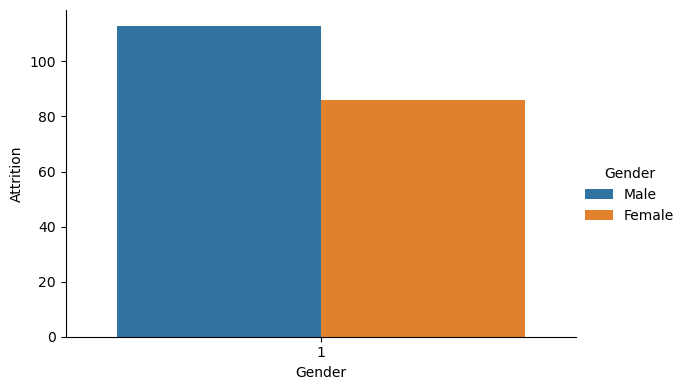

In [13]:
# gender and attrition
sns.catplot(x='Attrition',hue='Gender',data=df_attrition, kind='count',height=4, aspect=1.5)
plt.xlabel('Gender')
plt.ylabel('Attrition')

Men and women are almost equally likely to attrition.

Text(43.72709780092593, 0.5, 'Attrition')

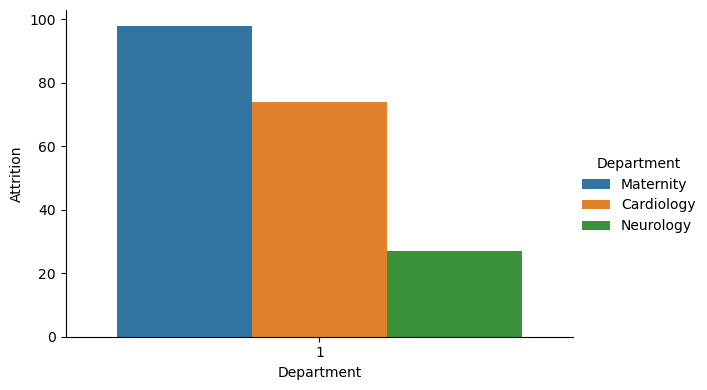

In [14]:
# dept and attrition
sns.catplot(x='Attrition',hue='Department',data=df_attrition, kind='count',height=4, aspect=1.5)
plt.xlabel('Department')
plt.ylabel('Attrition')

Employees working in Maternity department are more likely to attrition followed by cardiology. Neurology department has very less attrition rates. So the employee management of Neurology department could be assessed and can be adapted to other departments to see if it reduces attrition rates.

In [89]:
count=df_attrition.groupby(['Attrition', 'Department']).size()
total_counts = df_attrition.groupby('Attrition').size()
percentages = count / total_counts * 100
percentages

Attrition  Department
1          Cardiology    37.185930
           Maternity     49.246231
           Neurology     13.567839
dtype: float64

49.2% of total employees who has attritioned belongs to Maternity department.

<BarContainer object of 3 artists>

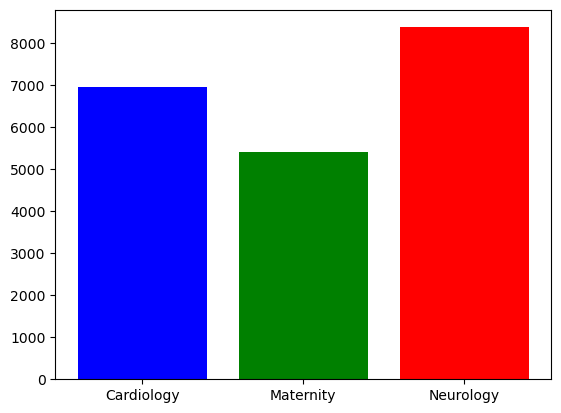

In [15]:
dm=df.groupby('Department')['MonthlyIncome'].mean()
plt.bar(dm.index, dm.values,color=['blue','green','red'])

This graph supports the earlier findings. Maternity department has the highest attrition and its also connected with comparitively less monthly salary. Neurology department has very less attrition rates and has the highest monthly salary.

Text(38.289576903292186, 0.5, 'Attrition')

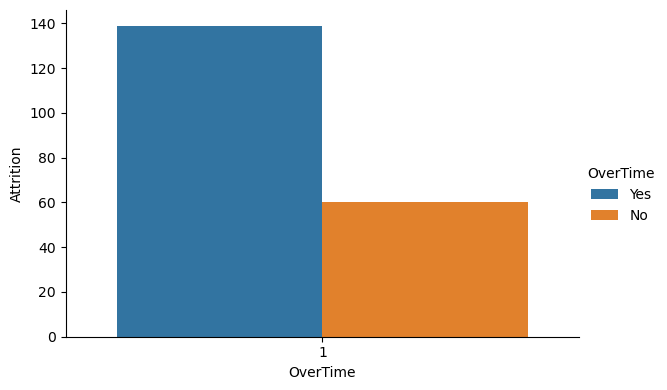

In [16]:
# overtime and attrition
sns.catplot(x='Attrition',hue='OverTime',data=df_attrition, kind='count',height=4, aspect=1.5)
plt.xlabel('OverTime')
plt.ylabel('Attrition')

In [17]:
count=df_attrition.groupby(['Attrition', 'OverTime']).size()
total_counts = df_attrition.groupby('Attrition').size()
percentages = count / total_counts * 100
percentages

Attrition  OverTime
1          No          30.150754
           Yes         69.849246
dtype: float64

69.8% of employees who have left the job were doing overtime work.

Text(47.104357638888885, 0.5, 'Attrition')

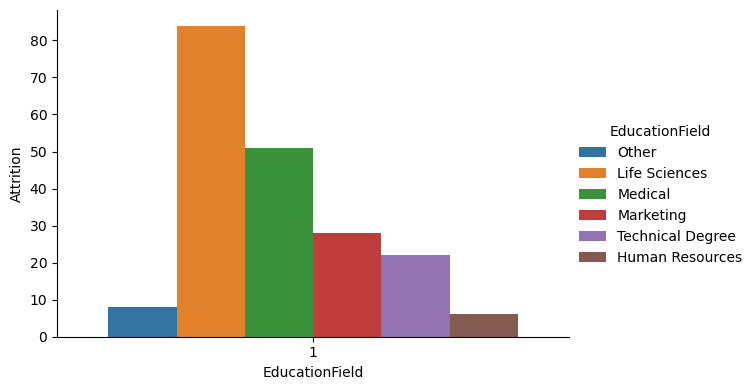

In [18]:
sns.catplot(x='Attrition',hue='EducationField',data=df_attrition,kind='count',height=4, aspect=1.5)
plt.xlabel('EducationField')
plt.ylabel('Attrition')

Among the employees, those who come from life science background has shown maximum attrition rates followed by medical field.

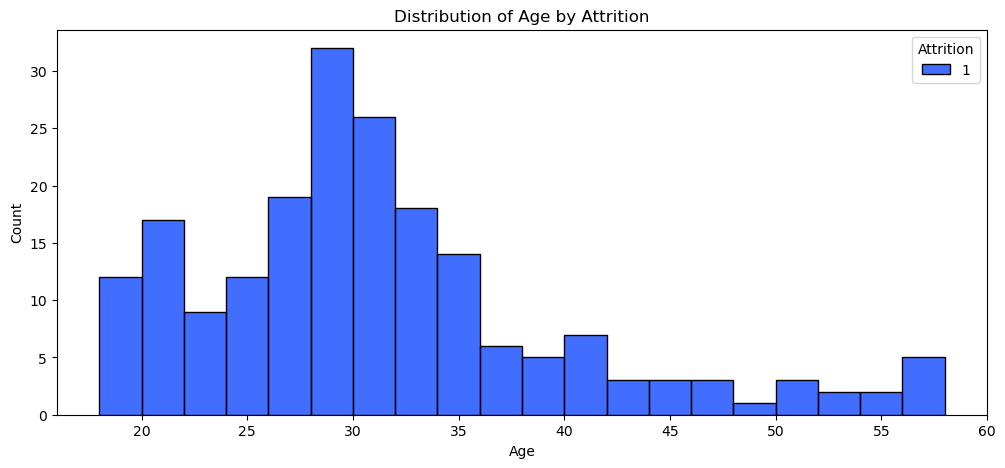

In [115]:
palette=sns.color_palette("bright")

plt.figure(figsize=(12, 5))
sns.histplot(data=df_attrition, x="Age", hue="Attrition", multiple="stack", palette=palette, bins=20)
plt.title("Distribution of Age by Attrition")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Majority employees who have attritioned belongs to age group 28-32 approximately. 

Text(42.29576903292181, 0.5, 'Attrition')

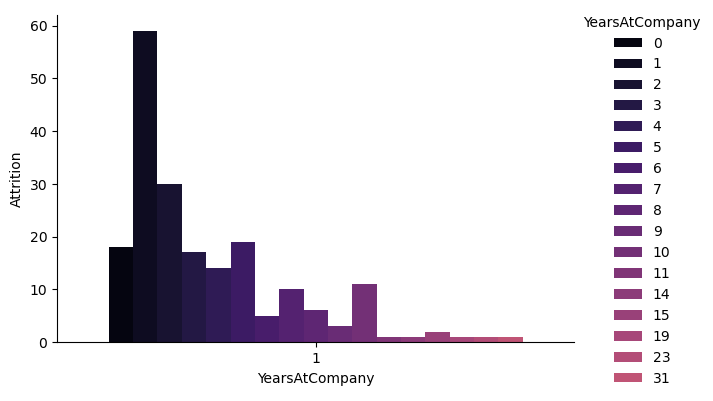

In [19]:
palette=sns.color_palette("magma", 29)
sns.catplot(x='Attrition',hue='YearsAtCompany',data=df_attrition,kind='count',height=4, aspect=1.5,palette=palette)
plt.xlabel('YearsAtCompany')
plt.ylabel('Attrition')

Attrition is seem to be more common in people who are at the early stages of career (i.e., 1 year into a company).

Text(49.34023437500001, 0.5, 'Attrition')

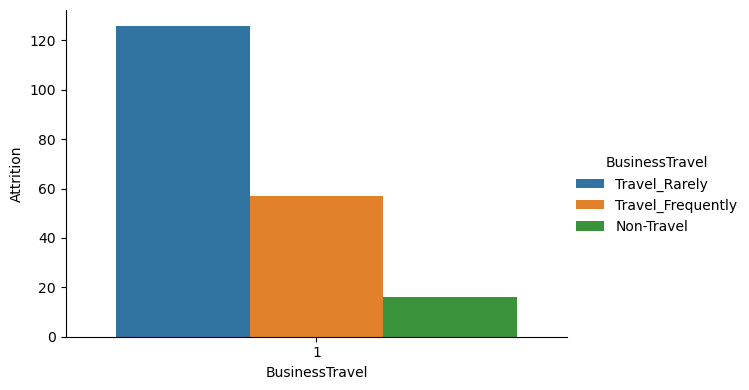

In [20]:
sns.catplot(x='Attrition',hue='BusinessTravel',data=df_attrition, kind='count',height=4, aspect=1.5)
plt.xlabel('BusinessTravel')
plt.ylabel('Attrition')

Frequent business travels are not the main causes of attrition by this graph.

Text(46.873408564814824, 0.5, 'Attrition')

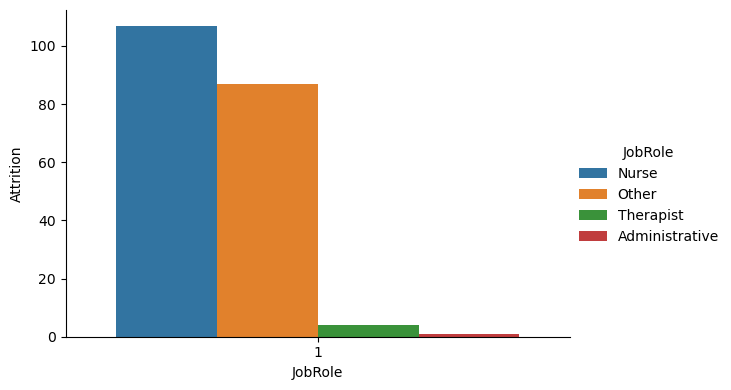

In [21]:
sns.catplot(x='Attrition',hue='JobRole',data=df_attrition, kind='count',height=4, aspect=1.5)
plt.xlabel('JobRole')
plt.ylabel('Attrition')

Nurses are more likely to leave their jobs than other professions listed in the dataset.

In [22]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [23]:
df.drop(columns=['EmployeeID','DailyRate','EmployeeCount','HourlyRate','MonthlyRate','Over18'],axis=1,inplace=True)

In [25]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,Cardiology,1,2,Life Sciences,2,Female,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Maternity,8,1,Life Sciences,3,Male,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Maternity,2,2,Other,4,Male,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Maternity,3,4,Life Sciences,4,Female,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Maternity,2,1,Medical,1,Male,3,...,4,80,1,6,3,3,2,2,2,2


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['EducationField']=le.fit_transform(df['EducationField'])
df['Department']=le.fit_transform(df['Department'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['OverTime']=le.fit_transform(df['OverTime'])                                

In [27]:
df['Department'][:5]

0    0
1    1
2    1
3    1
4    1
Name: Department, dtype: int32

<Axes: xlabel='Attrition', ylabel='count'>

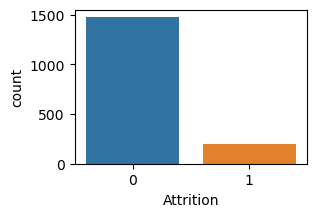

In [30]:
plt.figure(figsize=(3,2))
sns.countplot(x='Attrition',data=df)

In [31]:
df['Attrition'].value_counts()

Attrition
0    1477
1     199
Name: count, dtype: int64

There is significant imbalance in the dataset.

# FEATURE SELECTION

In [32]:
df.select_dtypes(include=['int']).columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [33]:
# We can check for multicollinearity
from statsmodels.stats.outliers_influence import  variance_inflation_factor
x=df.drop('Attrition',axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,2.095839,Age
1,1.018635,BusinessTravel
2,1.165291,Department
3,1.020436,DistanceFromHome
4,1.060985,Education
5,1.012997,EducationField
6,1.016082,EnvironmentSatisfaction
7,1.027006,Gender
8,1.019373,JobInvolvement
9,11.886189,JobLevel


In [34]:
# We could eliminate the features from df having vif>5 (except monthly income as its relevant logically)
df.drop(columns=['JobLevel','StandardHours'],axis=1,inplace=True)

<Axes: >

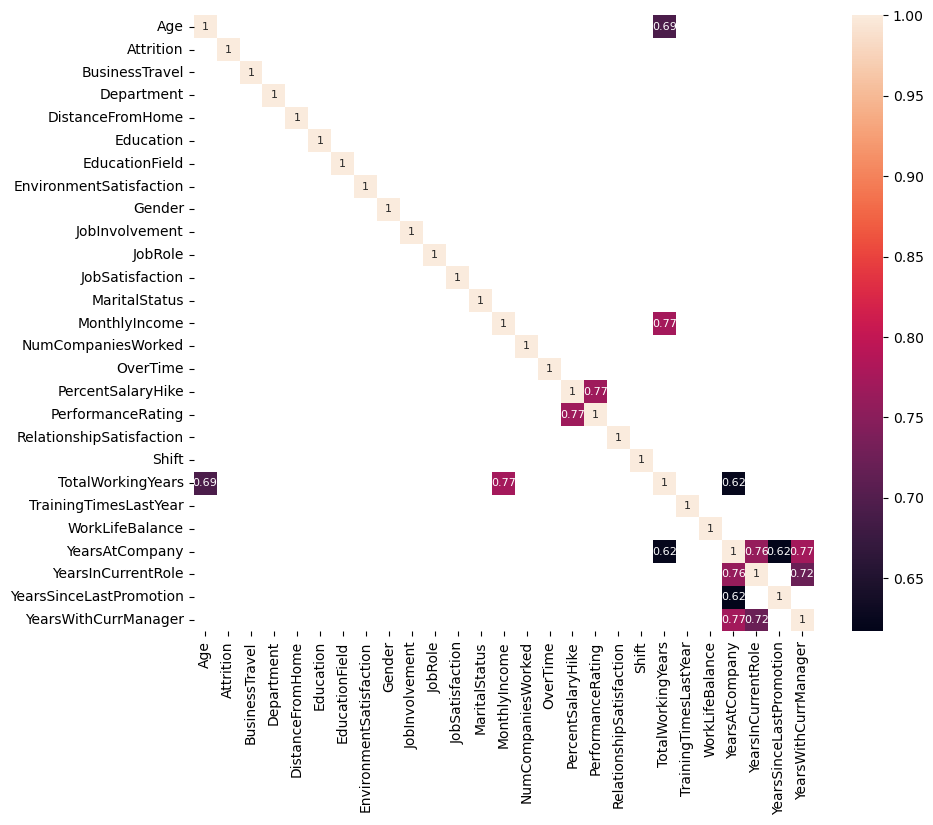

In [35]:
# correlation heatmap
corrl=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrl,annot=True,mask=corrl<0.6,annot_kws={'size':8})

Highly correlated features may affect model performance, so we can delete 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'

In [36]:
df.drop(columns=['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1,inplace=True)

In [38]:
df.select_dtypes(include=['int']).columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'Shift',
       'TrainingTimesLastYear', 'WorkLifeBalance'],
      dtype='object')

In [39]:
x=df[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'Shift',
       'TrainingTimesLastYear', 'WorkLifeBalance']]
y=df['Attrition']

In [40]:
# SelectKBest for selection of numerical features
from sklearn.feature_selection import SelectKBest,f_classif
best=SelectKBest(score_func=f_classif,k='all')
a=best.fit(x,y)
col=pd.DataFrame(x.columns)
sco=pd.DataFrame(a.scores_)
df2=pd.concat([col,sco],axis=1)
df2.columns=['Features','Scores']
df2.nlargest(6,'Scores')

,Features,Scores
1,Attrition,inf
15,OverTime,215.021887
0,Age,102.301122
13,MonthlyIncome,65.135114
12,MaritalStatus,59.055581
9,JobInvolvement,47.457197


We could select Overtime,Age, MonthlyIncome, MaritalStatus,JobInvolvement,Shift, DistanceFromHome,EnvironmentSatisfaction,WorkLifeBalance 

In [41]:
X=df[['OverTime','Age', 'MonthlyIncome','MaritalStatus','JobInvolvement']]
y=df['Attrition']
scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,random_state=67)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 5), (419, 5), (1257,), (419,))

In [44]:
df['Attrition'].value_counts()

Attrition
0    1477
1     199
Name: count, dtype: int64

Oversampling can be done using SMOTE(Synthetic Minority Oversampling Technique)to deal with imalance in the dataset. The current dataset has 1477 data with no attrition and 199 data with attrition details.

In [71]:
from imblearn.over_sampling import SMOTE
ov=SMOTE(random_state=78,k_neighbors=3,sampling_strategy='auto')
x_train,y_train=ov.fit_resample(x_train,y_train)

In [72]:
from collections import Counter
print('No. of label data b/f smote: ', Counter(y_train))
print('No. of label data a/f smote: ', Counter(y_train))

No. of label data b/f smote:  Counter({1: 1175, 0: 1175})
No. of label data a/f smote:  Counter({1: 1175, 0: 1175})


Now, imbalance is corrected and we can move to model building.

# MODEL BUILDING & VALIDATION

In [73]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2350, 22), (336, 22), (2350,), (336,))

In [136]:
# Let's try Logistic regression first
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [122]:
from sklearn.metrics import accuracy_score, classification_report
def score (model,a,b,c,d,train=True):
    if train:
        y_pred1 = model.predict(x_train)
        print('Accuracy of train set: ',accuracy_score(y_train,y_pred1))
    else:
        y_pred2 = model.predict(x_test)
        print('Accuracy of test set: ',accuracy_score(y_test,y_pred2))

In [123]:
print(score(lr,x_train,y_train,x_test,y_test,train=True))
print(score(lr,x_train,y_train,x_test,y_test,train=False))

Accuracy of train set:  0.9480851063829787
None
Accuracy of test set:  0.9464285714285714
None


In [137]:
y_pred2 = lr.predict(x_test)

Text(0.5, -7.277777777777782, 'Predicted label')

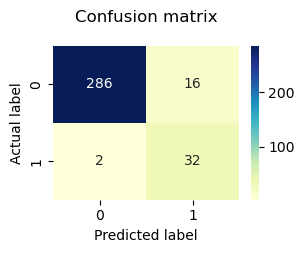

In [138]:
# heatmap visualization of the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
cm1=pd.DataFrame(cnf_matrix)
plt.figure(figsize=(3,2))
p = sns.heatmap(cm1, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       378
           1       0.27      0.73      0.39        41

    accuracy                           0.78       419
   macro avg       0.62      0.76      0.63       419
weighted avg       0.90      0.78      0.82       419



The model performs well in identifying negative cases but struggles with positive cases, resulting in a high number of false positives and false negatives for the positive class. 

The precision to predict negative cases is high (0.96) but the model's precision to predict positive cases is very low (0.27)

In [79]:
# Let's try random forest
from sklearn.ensemble import RandomForestClassifier

In [80]:
rd=RandomForestClassifier()
rd.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
print(score(rd,x_train,y_train,x_test,y_test,train=True))
print(score(rd,x_train,y_train,x_test,y_test,train=False))

Accuracy of train set:  1.0
None
Accuracy of test set:  1.0
None


In [126]:
y_pred2=rd.predict(x_test)

In [127]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00        34

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336



Text(0.5, -7.277777777777782, 'Predicted label')

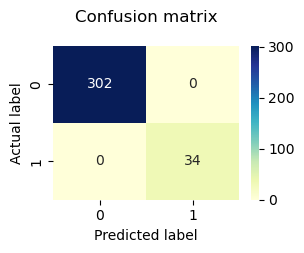

In [134]:
# heatmap visualization of the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
cm2=pd.DataFrame(cnf_matrix)
plt.figure(figsize=(3,2))
p = sns.heatmap(cm2, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The random forest model correctly identifies all positive and negative cases.

In [117]:
# Lets try XGBoost
import xgboost as xgb

In [118]:
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
y_pred=xgb.predict(x_test)

In [120]:
# Check score of the model
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('R-square score of the XGBClassifier model- ',score)

R-square score of the XGBClassifier model-  1.0


In [124]:
print(score(xgb,x_train,y_train,x_test,y_test,train=True))
print(score(xgb,x_train,y_train,x_test,y_test,train=False))

Accuracy of train set:  1.0
None
Accuracy of test set:  1.0
None


In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00        34

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336



Text(0.5, -7.277777777777782, 'Predicted label')

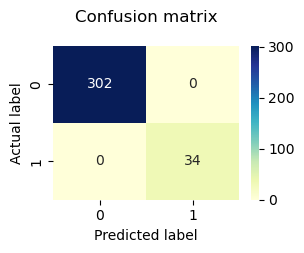

In [133]:
# heatmap visualization of the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cm3=pd.DataFrame(cnf_matrix)
plt.figure(figsize=(3,2))
p = sns.heatmap(cm3, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The XGBoost model correctly identifies all positive and negative cases.

# Key Findings from EDA:

    * Gender has no role in attrition.  
    
    * Majority employees who have attritioned belongs to age group 28-32 approximately.
    
    * Around half of the attritioned employees (49.2%) belongs to Maternity department. Employees working in Maternity department are more likely to attrition followed by cardiology. 
     
    * High attrition rate of Maternity department is also connected with comparitively less monthly salary. Neurology department has very less attrition rates and has the highest monthly salary.
    
    * As Neurology department has very less attrition rates, the employee management of Neurology department could be assessed and can be adapted to other departments to see if it reduces attrition rates.
    
    * 69.8% of employees who have left the job were doing overtime work.
    
    * Employees having life science education background has shown maximum attrition rates followed by medical field.
    
    * Attrition is seem to be more common in people who are at the early stages of career (i.e., 1 year into a company).
    
    * Nurses are more likely to leave their jobs than other professions listed in the dataset.


# Evaluation of Models

In [132]:
scores_dict = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    r'Training accuracy (%)': [94.8, 100, 100],
    r'Testing accuracy (%)': [94.6, 100, 100],
}
scores=pd.DataFrame(scores_dict)
scores

,Model,Training accuracy (%),Testing accuracy (%)
0,Logistic Regression,94.8,94.6
1,Random Forest,100.0,100.0
2,XGBoost,100.0,100.0


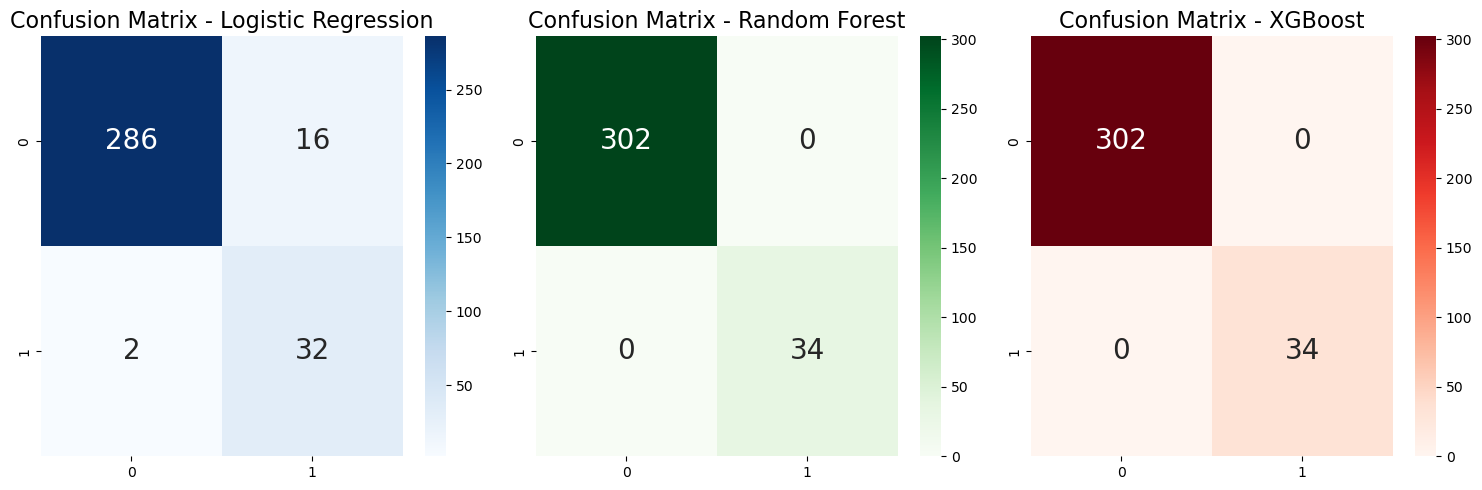

In [147]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d',annot_kws={'size':20})
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)

plt.subplot(1, 3, 2)
sns.heatmap(cm2, annot=True, cmap='Greens', fmt='d',annot_kws={'size':20})
plt.title('Confusion Matrix - Random Forest',fontsize=16)

plt.subplot(1, 3, 3)
sns.heatmap(cm3, annot=True, cmap='Reds', fmt='d',annot_kws={'size':20})
plt.title('Confusion Matrix - XGBoost', fontsize=16)

plt.tight_layout()
plt.show()

# Random Forest and XGBoost models outperform Logistic Regression in terms of both accuracy scores and the classification of true positives and true negatives. 